In [3]:
import pandas as pd

In [6]:
customers = pd.read_csv('data/Ecommerce Customers')

In [7]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [15]:
import seaborn as sns

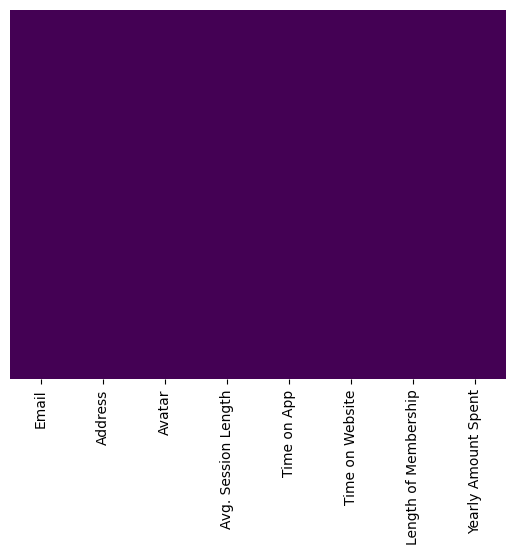

In [16]:
sns.heatmap(customers.isnull(), yticklabels=False, cbar=False, cmap='viridis');


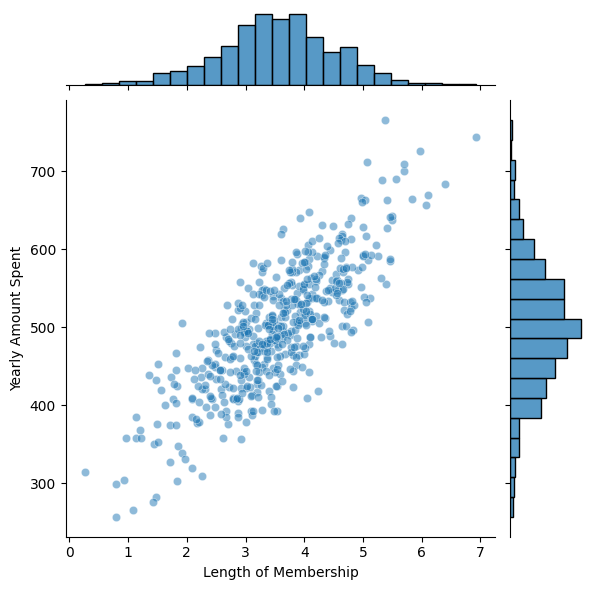

In [18]:
sns.jointplot(x="Length of Membership", y="Yearly Amount Spent",data=customers, alpha=0.5)

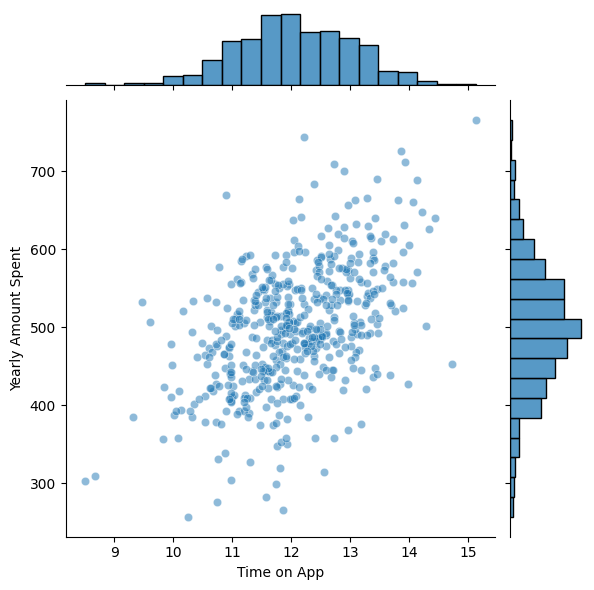

In [19]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent",data=customers, alpha=0.5)


In [27]:
import matplotlib.pyplot as plt

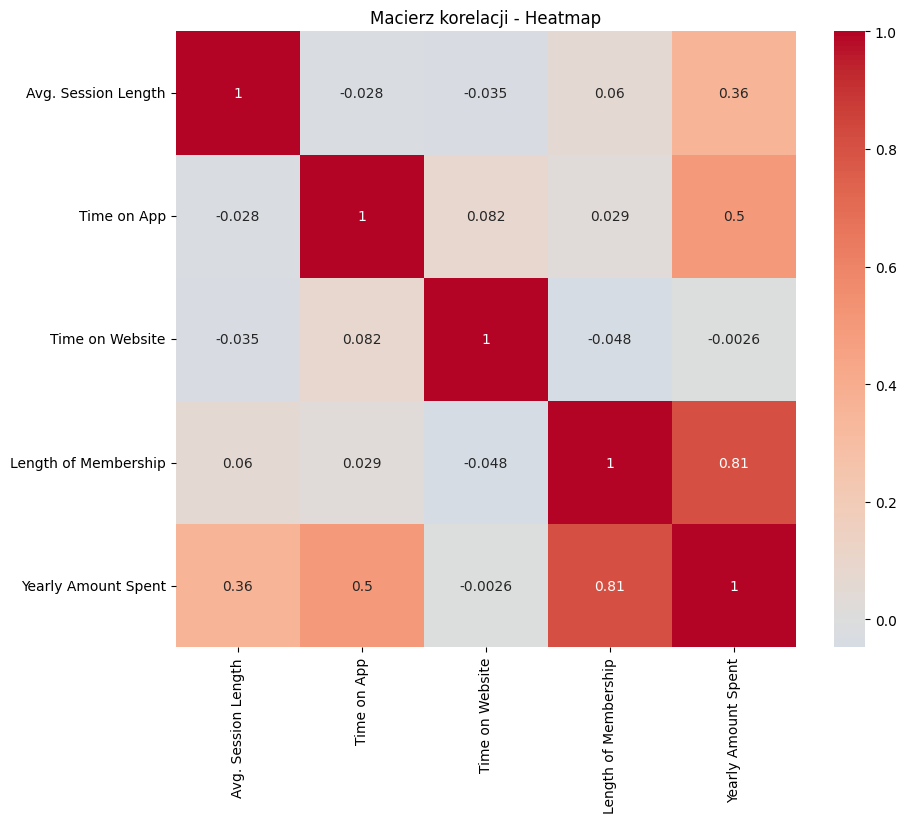

In [26]:

numerical_columns = customers.select_dtypes(include=['float', 'int'])

correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))  # Ustawiamy rozmiar wykresu
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Macierz korelacji - Heatmap")
plt.show()

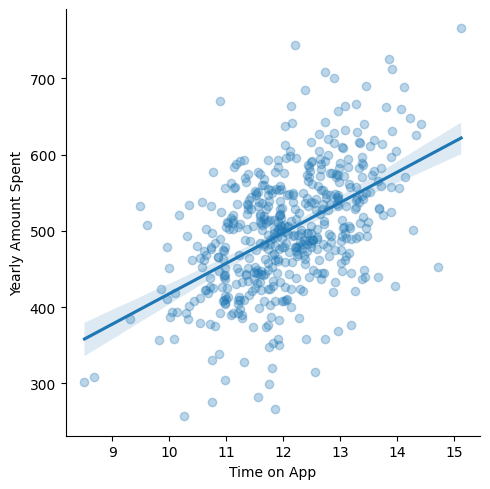

In [29]:
sns.lmplot(x='Time on App', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})


In [30]:
#training

X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [31]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [32]:
y=customers["Yearly Amount Spent"]
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [43]:
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']) # wyższy coeff to ważniejsza zmienna


In [46]:
cdf

,Coeff
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


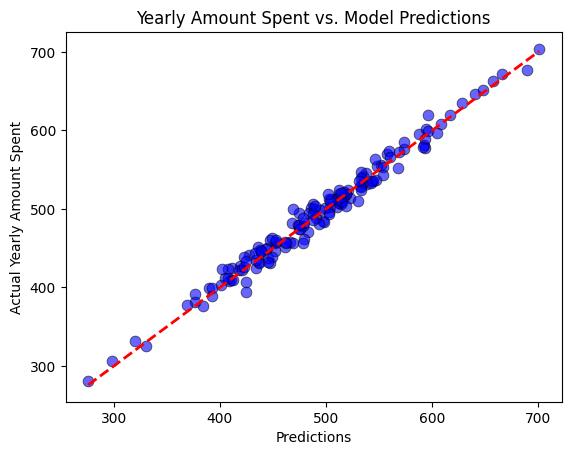

In [47]:
predictions = lm.predict(X_test) # przewidywane wartości
sns.scatterplot(x=y_test, y=predictions, 
                # Ustawiamy kolor punktów na niebieski, aby były wyraźnie widoczne.
                color='blue', 
                # Ustawiamy przezroczystość (alpha) na 0.6, co pomaga zobaczyć nakładające się punkty.
                alpha=0.6, 
                # Dodajemy czarne obramowanie do punktów (edgecolor='k'), aby były bardziej czytelne.
                edgecolor='k', 
                # Ustawiamy rozmiar punktów na 60, aby były dobrze widoczne na wykresie.
                s=60)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)


plt.xlabel('Predictions')
plt.ylabel('Actual Yearly Amount Spent')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()